### Student Information
Name: 邱筠婷

Student ID: 109021228

GitHub ID: 135101542

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### downlaod the data
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

/Users/ting/Development/DM2024-Lab1-Homework/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [4]:
df[0:2]

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...


In [5]:
df.isnull().sum()

sentiment    0
comment      0
dtype: int64

In [6]:
import data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [7]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [8]:
dummy_series = pd.Series(["dummy_record"], index=["sentiment"])

In [9]:
dummy_series

sentiment    dummy_record
dtype: object

In [10]:
dummy_series.to_frame().T

,sentiment
0,dummy_record


In [11]:
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [12]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [13]:
dummy_dict = [{'sentiment': 'dummy_record'}]
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [14]:
len(df)

1501

In [15]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [18]:
len(df)

1500

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [20]:
sum(df.duplicated())

1

In [21]:
sum(df.duplicated('comment'))

1

In [22]:
df.drop_duplicates(keep=False, inplace=True)

In [23]:
len(df)

1498

In [24]:
sample_df = df.sample(n=1000)

In [25]:
len(sample_df)

1000

In [26]:
sample_df[0:4]

,sentiment,comment
560,not nostalgia,its scary that I am only 12 and in love with t...
1375,nostalgia,There are so many classic hits from this era a...
1161,nostalgia,Jesus remember dancing to this at the Capital ...
1077,not nostalgia,And this is why I love hanging out with my par...


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

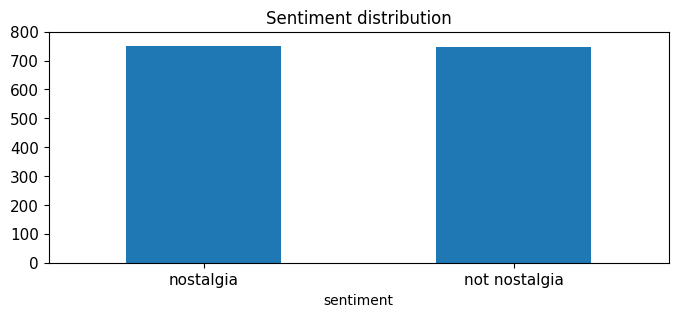

In [28]:
print(df.sentiment.value_counts())
df.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment distribution',
                                 ylim=[0, 800],
                                 rot=0, fontsize=11, figsize=(8,3))

sentiment
nostalgia        505
not nostalgia    495
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

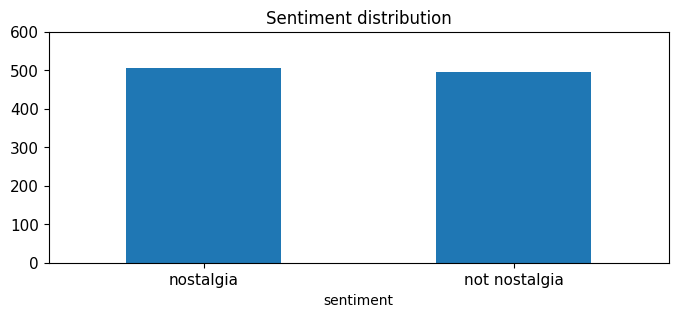

In [29]:
print(sample_df.sentiment.value_counts())
sample_df.sentiment.value_counts().plot(kind='bar',
                                 title='Sentiment distribution',
                                 ylim=[0, 600],
                                 rot=0, fontsize=11, figsize=(8,3))

<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

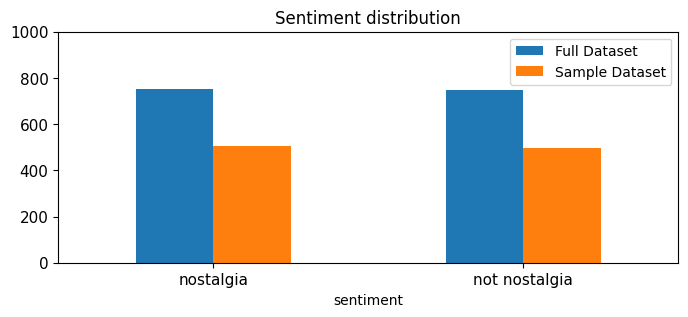

In [30]:
counts = df.sentiment.value_counts()
sample_counts = sample_df.sentiment.value_counts()

combined_df = pd.DataFrame({
    'Full Dataset': counts,
    'Sample Dataset': sample_counts,
}).fillna(0)

combined_df.plot(kind='bar',
                 title='Sentiment distribution',
                 ylim=[0, 1000],
                 rot=0, fontsize=11, figsize=(8,3))

In [31]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [32]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/ting/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
df[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [35]:
df[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [37]:
count_vect.get_feature_names_out()[100]

'3rd'

In [38]:
analyze = count_vect.build_analyzer()

In [39]:
analyze(df['comment'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [40]:
df_counts.shape

(1498, 3730)

In [41]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [42]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [43]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [44]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [45]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [46]:
plot_z = df_counts[0:20, 0:20].toarray()

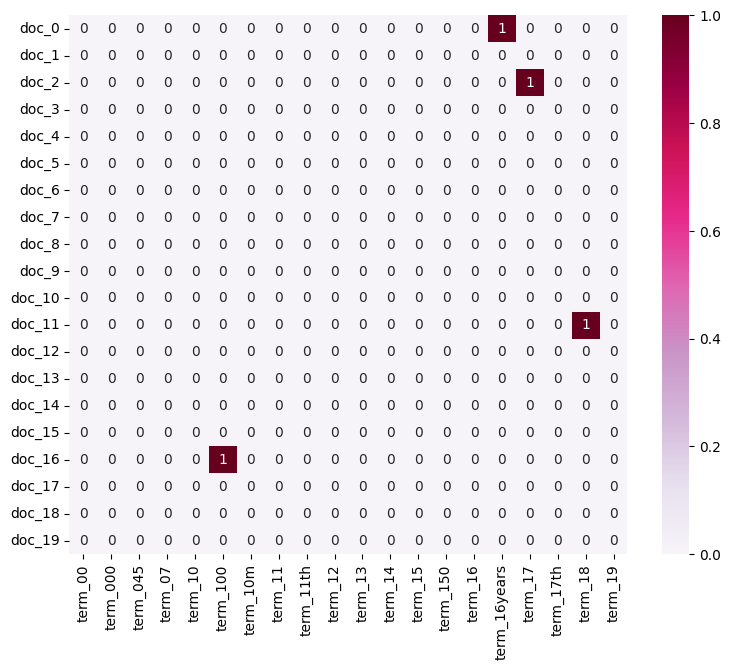

In [47]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [49]:
import numpy as np

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [50]:
term_frequencies[0]

1

/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/3140323867.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

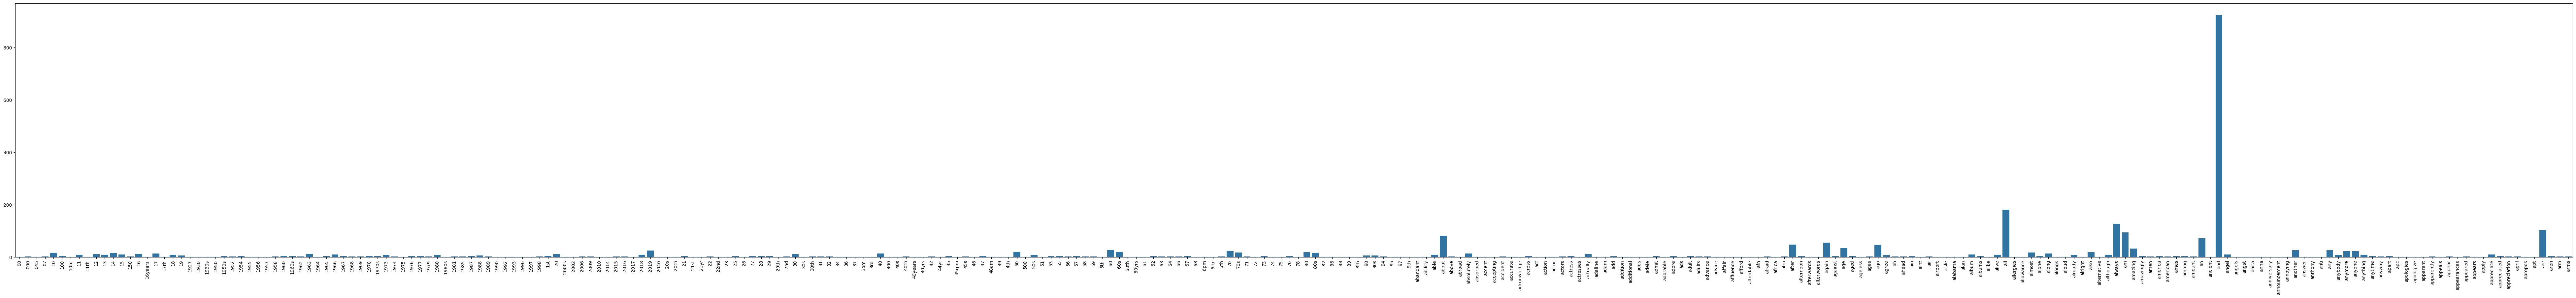

In [51]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [52]:
# Answer here
import plotly.express as px

# Sample data setup (replace with your actual data)
terms = count_vect.get_feature_names_out()[:300]  # First 300 terms
frequencies = term_frequencies[:300]  # Corresponding term frequencies

# Create a Plotly bar chart
fig = px.bar(x=terms, y=frequencies, labels={'x': 'Terms', 'y': 'Frequency'},
             title="Term Frequencies Visualization")

# Customize layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    height=600, width=1400,    # Adjust figure size
    title_font_size=20
)

# Show the interactive plot
fig.show()


In [53]:
threshold = 10
filtered_terms = [(term, freq) for term, freq in zip(terms, frequencies) if freq > threshold]
terms, frequencies = zip(*filtered_terms)

# Now create the Plotly visualization with fewer terms
fig = px.bar(x=terms, y=frequencies, labels={'x': 'Terms', 'y': 'Frequency'}, title="Term Frequencies (Filtered)")
fig.update_layout(xaxis=dict(tickangle=90), height=600, width=1400, title_font_size=20)
fig.show()

In [54]:
sorted_terms_freq = sorted(zip(terms, frequencies), key=lambda x: x[1], reverse=True)

sorted_terms, sorted_frequencies = zip(*sorted_terms_freq)

fig = px.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequency'}, title="Term Frequencies (Sorted by Frequency)")
fig.update_layout(xaxis=dict(tickangle=90), height=600, width=1400, title_font_size=20)
fig.show()

In [55]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/1516414146.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

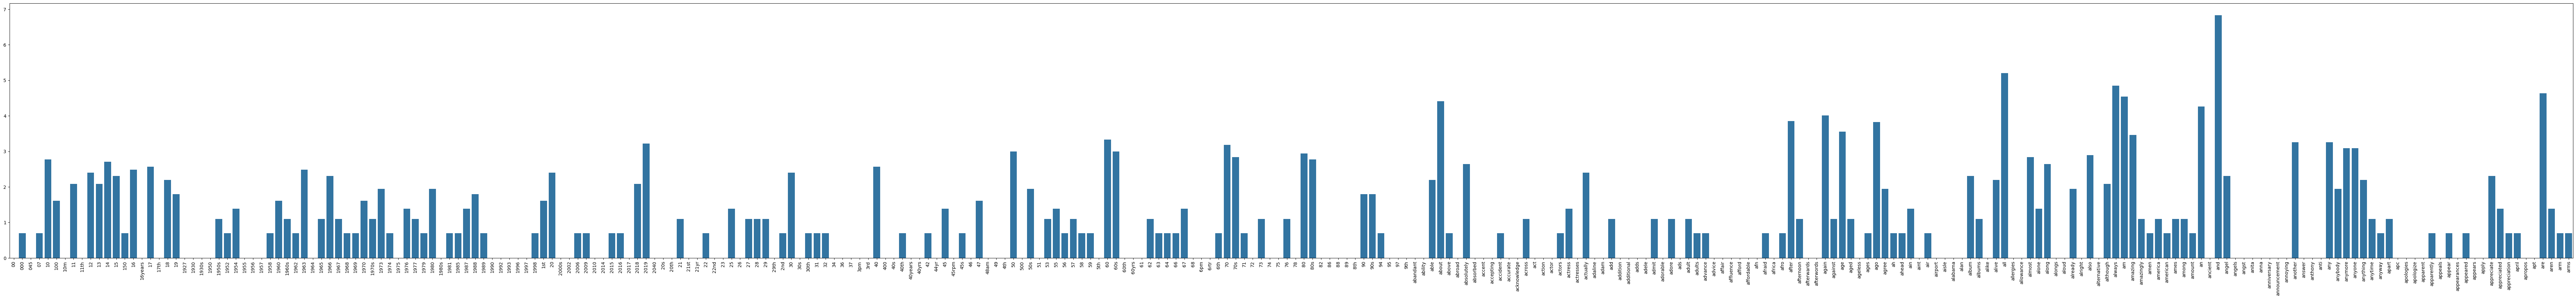

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [57]:
log_frequencies = np.log1p(sorted_frequencies)

fig = px.bar(x=sorted_terms, y=log_frequencies, labels={'x': 'Terms', 'y': 'Log(Frequency)'}, title="Term Frequencies (Log-Transformed)")
fig.update_layout(xaxis=dict(tickangle=90), height=600, width=1400, title_font_size=20)
fig.show()

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiments = df['sentiment'].unique()  # Get unique category labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for sentiment in sentiments:
    # Filter the original DataFrame by category
    sentiment_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [59]:
sentiment_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for sentiment not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


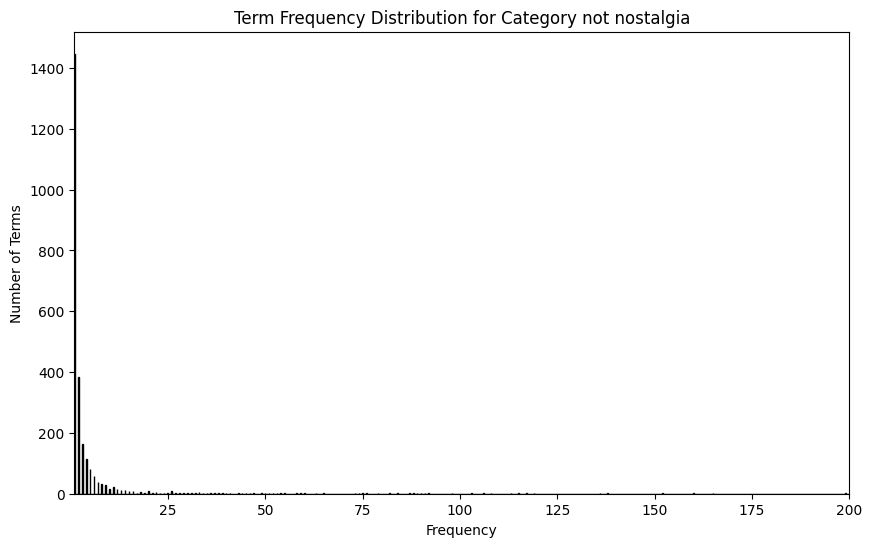

In [60]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [61]:
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'as', 'songs', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'singer', 'an', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'man', 'video', 'some', 'heard', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [62]:
sorted_counts

array([708, 451, 451, ...,   1,   1,   1])

In [63]:
sorted_indices

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [64]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'the'].sum(axis=0)

708

In [65]:
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [66]:
sorted_counts

array([  1,   1,   1, ..., 451, 451, 708])

In [67]:
sorted_indices

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [68]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'milestone'].sum(axis=0)

1

In [69]:
sentiment_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in sentiments:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
classic     23
got         23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       451
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[sentiment]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


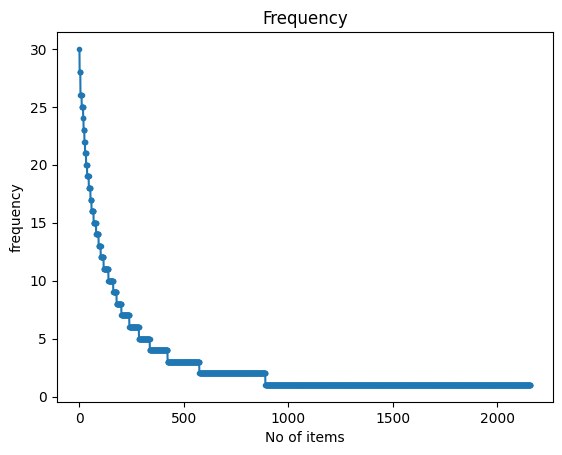

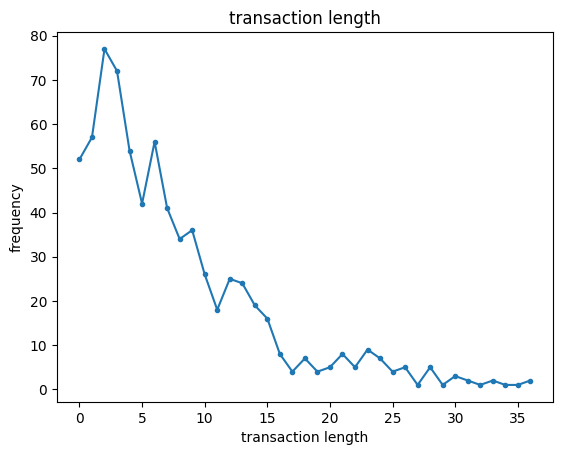

In [71]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


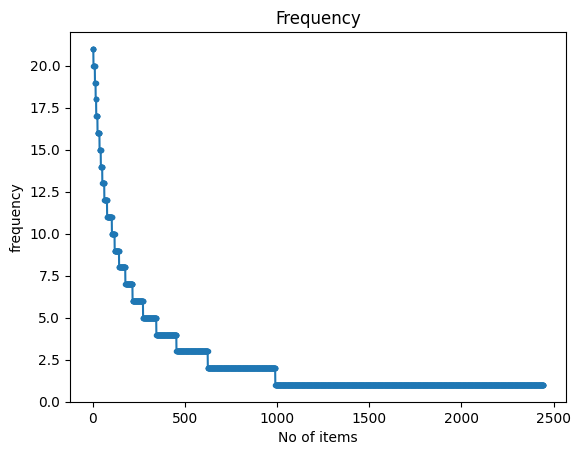

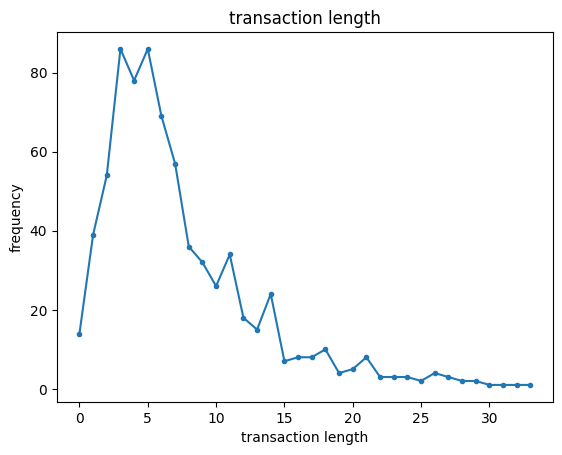

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [73]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.010213136672973633


In [74]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [75]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.006425142288208008


In [76]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,elvis,21
140,every,21
141,loved,21
142,them,21


In [77]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [82]:
X_pca_tdm.shape

(1500, 2)

In [83]:
X_tsne_tdm.shape

(1500, 2)

In [84]:
X_umap_tdm.shape

(1500, 2)

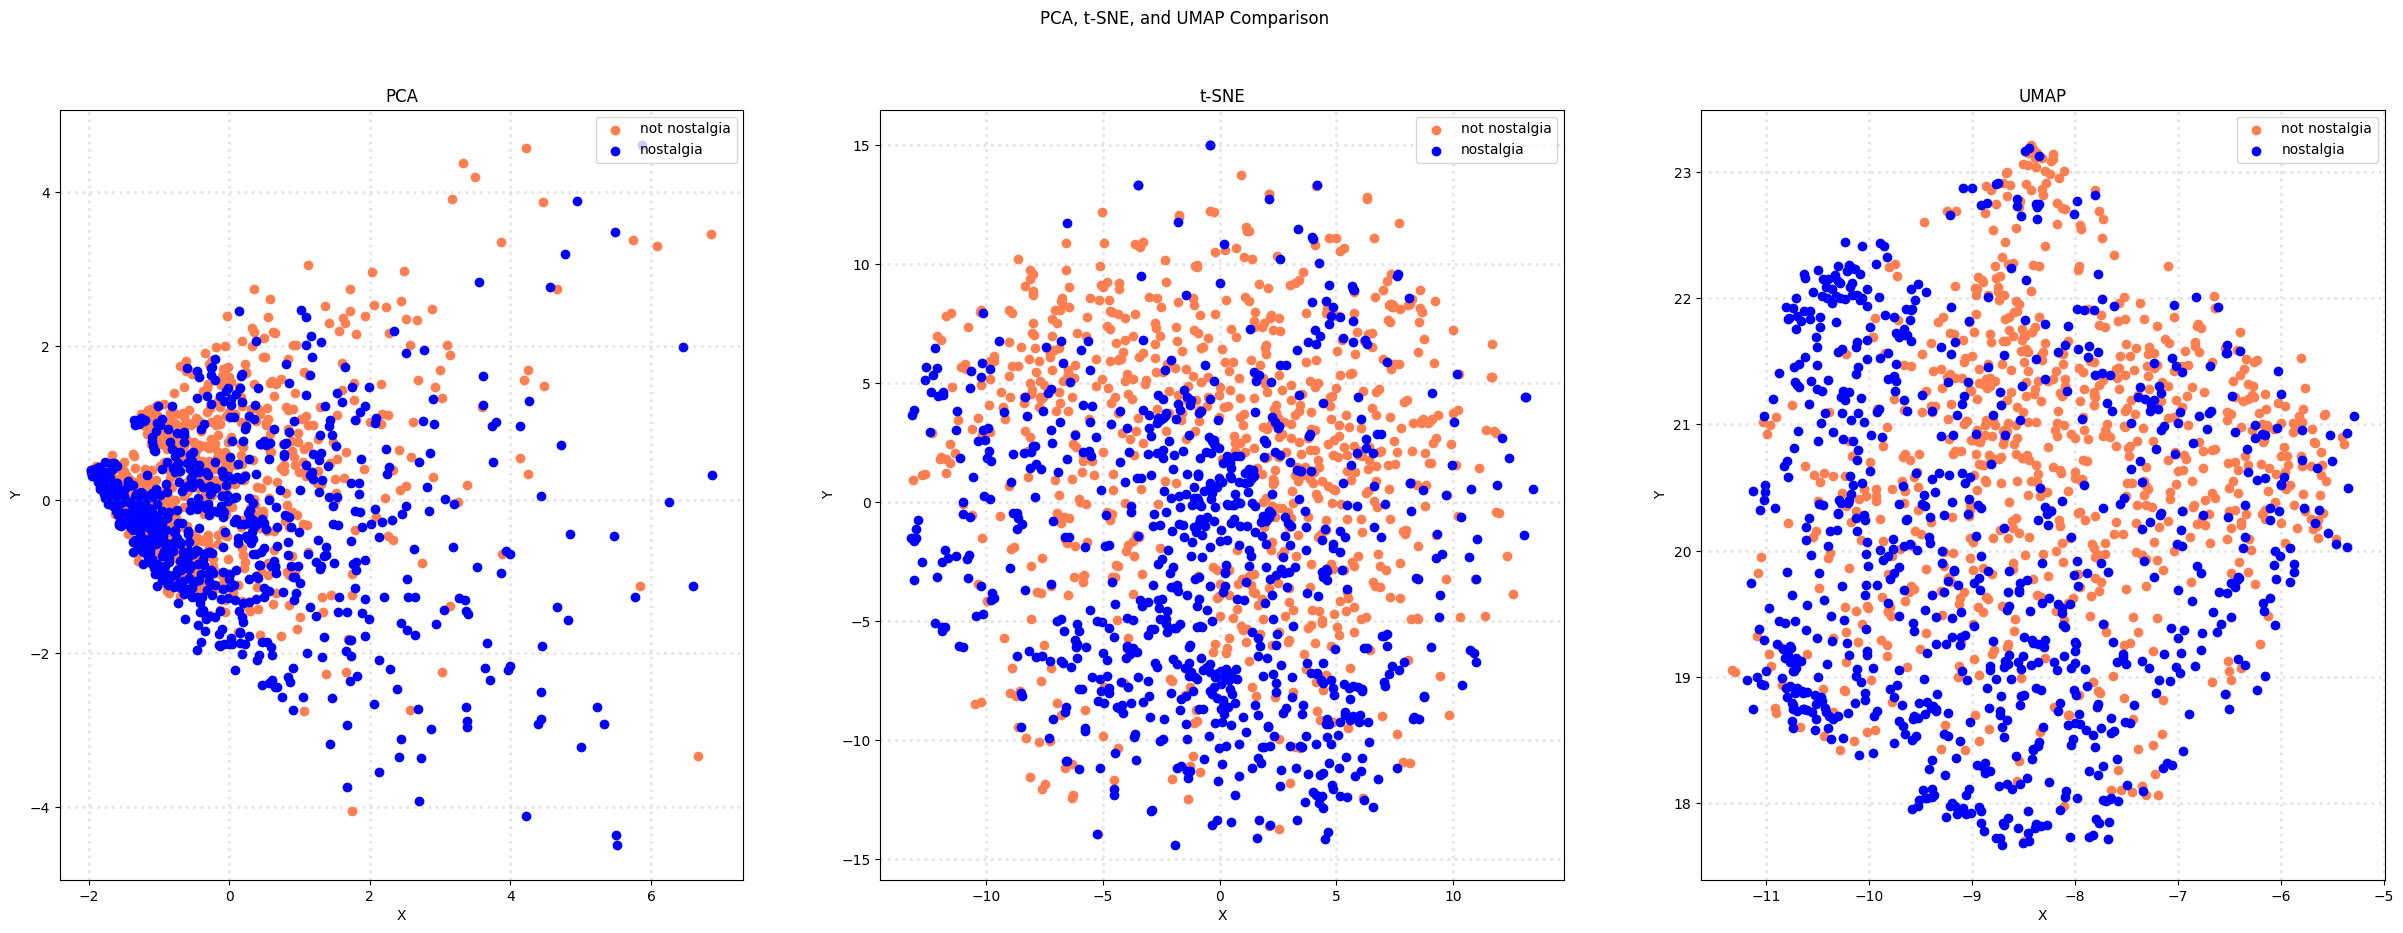

In [85]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = df_reduced[df['sentiment'] == sentiment].T[0]
        ys = df_reduced[df['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [86]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

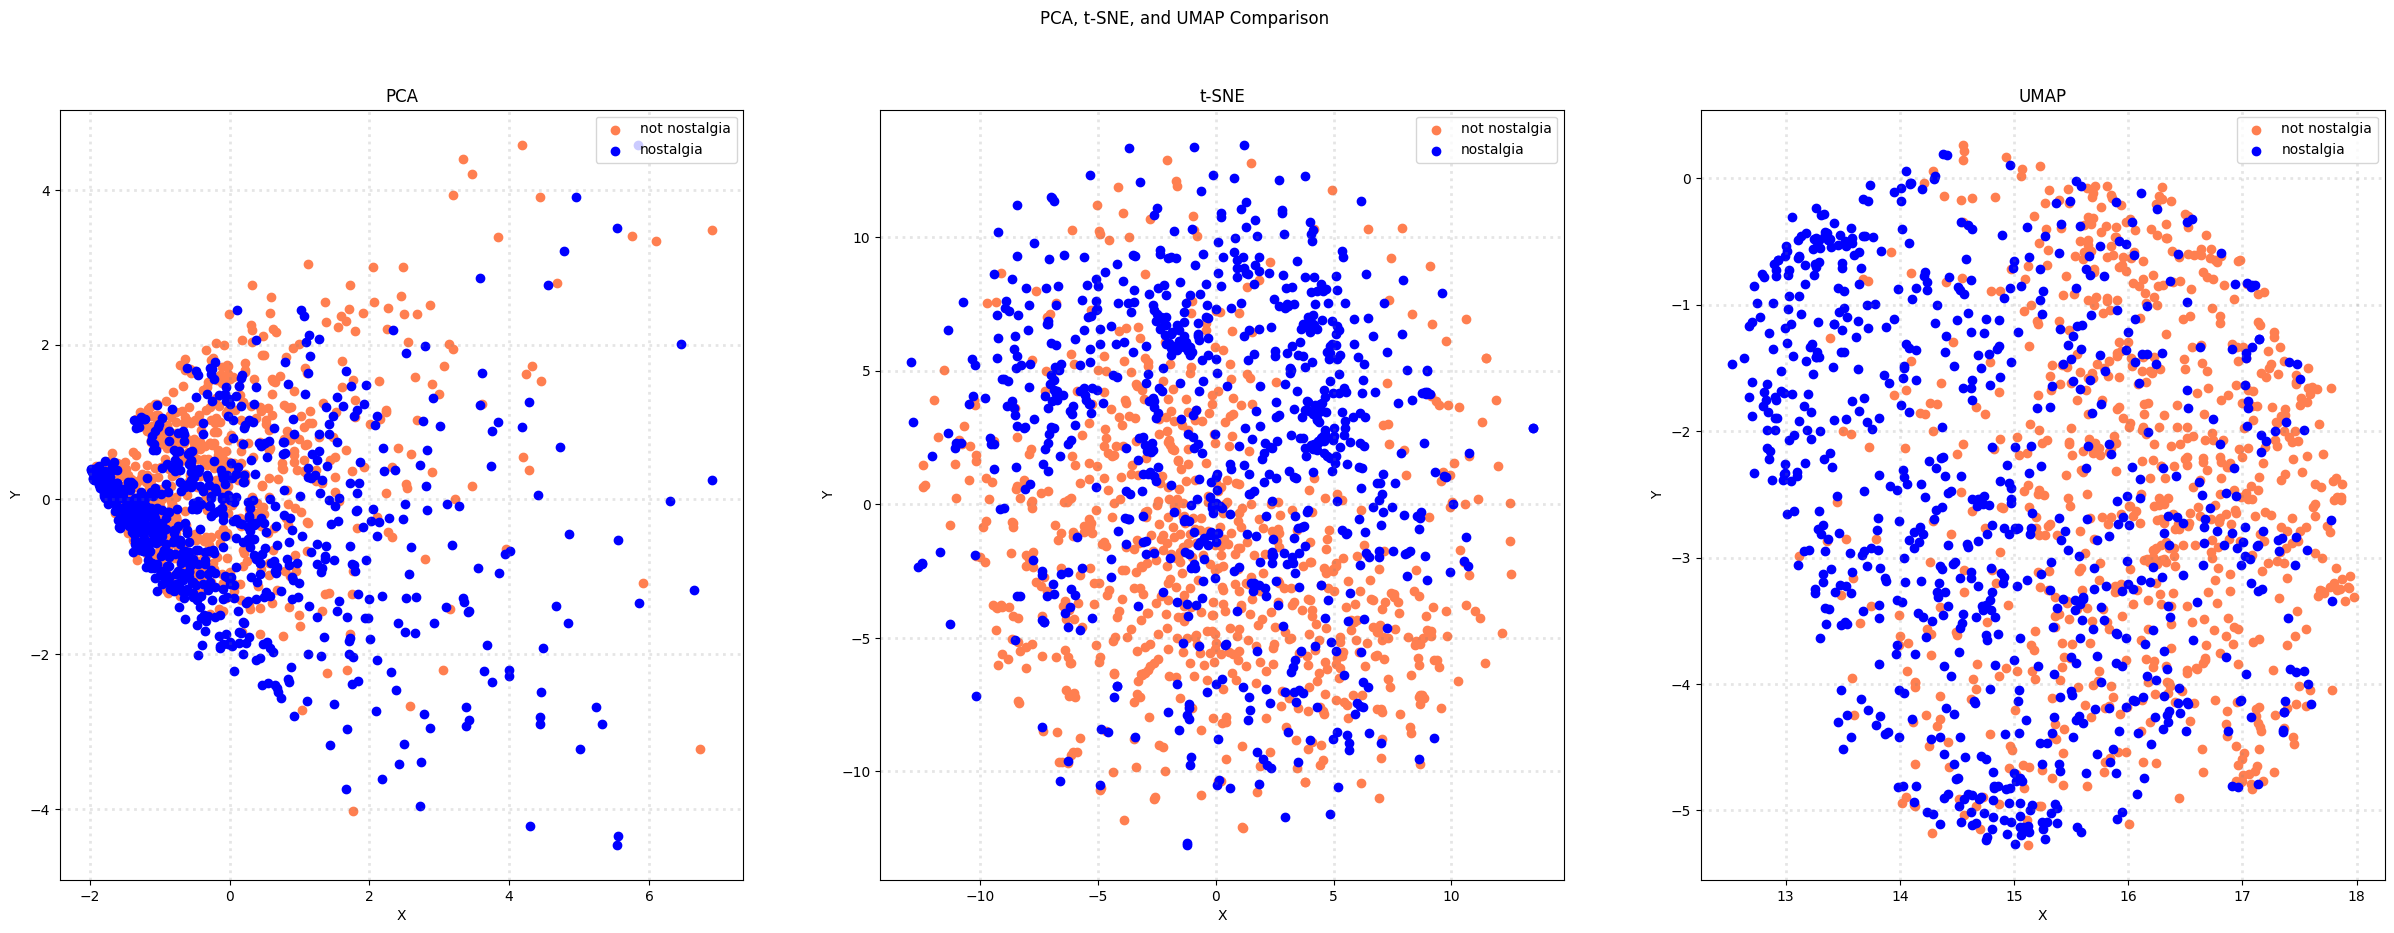

In [87]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[df['sentiment'] == sentiment].T[0]
        ys = X_reduced[df['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

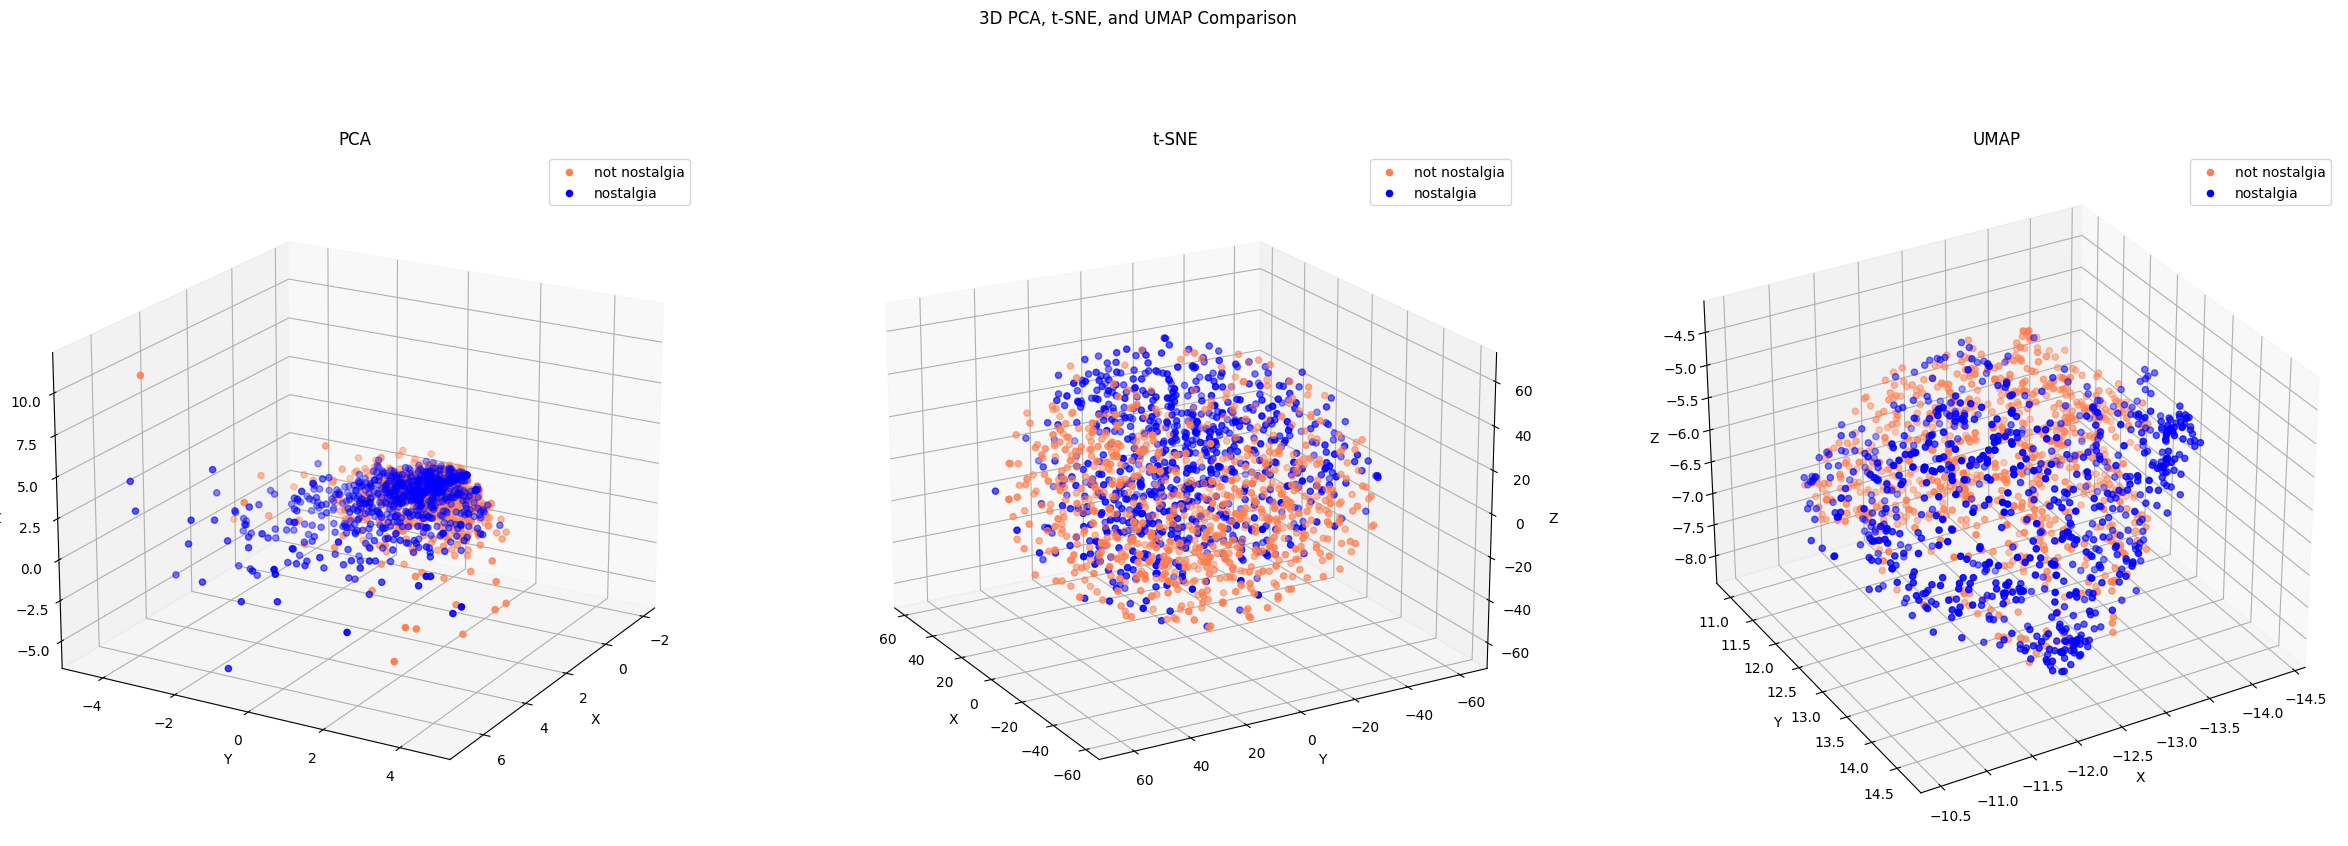

In [88]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, sentiments):
        xs = X_reduced[df['sentiment'] == category][:, 0]
        ys = X_reduced[df['sentiment'] == category][:, 1]
        zs = X_reduced[df['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_tdm, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_tdm, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_tdm, 'UMAP')

ax1.view_init(elev=20, azim=30)  # Elevation and azimuthal angles for PCA
ax2.view_init(elev=20, azim=150)  # Elevation and azimuthal angles for t-SNE
ax3.view_init(elev=30, azim=60)   # Elevation and azimuthal angles for UMAP

plt.show()

In [89]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [90]:
mlb = preprocessing.LabelBinarizer()

In [91]:
mlb.fit(df.sentiment)

LabelBinarizer()

In [92]:
df['bin_category'] = mlb.transform(df['sentiment']).tolist()

In [93]:
df['sentiment_binary'] = df['sentiment'].map({'nostalgia': '1', 'not nostalgia': '0' })

In [94]:
df[0:9]

,sentiment,comment,tokenized_text,bin_category,sentiment_binary
0,not nostalgia,He was a singer with a golden voice that I lov...,"{the, to, days, singers, Jim, of, age, for, ca...",[1],0
1,nostalgia,The mist beautiful voice ever I listened to hi...,"{to, ever, of, an, I, his, singing, kid, Never...",[0],1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"{the, to, gentle,, of, up, my, age, early., Je...",[0],1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"{the, Nam, to, 1st, served, granted, of, are, ...",[1],0
4,nostalgia,listening to his songs reminds me of my mum wh...,"{to, reminds, his, of, mum, my, songs, played,...",[0],1
5,nostalgia,"Every time I heard this song as a child, I use...","{to, RIP, Every, Jim, used, of, Reeves,, many,...",[0],1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","{the, to, Jim, changes, for, Reeves,, how, lis...",[0],1
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"{the, Jim, to, LISTENED, ., ALSO, am, puts, hi...",[0],1
8,not nostalgia,Wherever you are you always in my heart,"{Wherever, you, are, my, in, always, heart}",[1],0


In [95]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [96]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [97]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/bt/3g49w5yj1vl_4wn3y70ftlfm0000gq/T/ipykernel_62175/452772485.py:17: Dep

In [99]:
# Check the types and unique values in the relevant columns
print(df[['sentiment', 'bin_category']].dtypes)
print(df[['sentiment', 'bin_category']].head())


sentiment       object
bin_category    object
dtype: object
       sentiment bin_category
0  not nostalgia          [1]
1      nostalgia          [0]
2      nostalgia          [0]
3  not nostalgia          [1]
4      nostalgia          [0]


In [100]:
# Check for unhashable types in sentiment
print(df['sentiment'].apply(type).value_counts())
print(df['bin_category'].apply(type).value_counts())


sentiment
<class 'str'>    1500
Name: count, dtype: int64
bin_category
<class 'list'>    1500
Name: count, dtype: int64


In [101]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

sentiment_mapping = dict(df[['sentiment', 'sentiment_binary']].drop_duplicates().values)

target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

df_train, df_test, y_train, y_test = train_test_split(tdm_df, df['sentiment_binary'], test_size=0.3, random_state=42)

In [102]:
df_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_test)

target_names = ['nostalgia', 'not_nostalgia']

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9140    0.7556    0.8273       225
not_nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [105]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

sentiment_mapping = dict(df[['sentiment', 'sentiment_binary']].drop_duplicates().values)

target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

df_train, df_test, y_train, y_test = train_test_split(augmented_df, df['sentiment_binary'], test_size=0.3, random_state=42)

In [106]:
df_train

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_test

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
1116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_test)

target_names = ['nostalgia', 'not_nostalgia']

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9105    0.7689    0.8337       225
not_nostalgia     0.8000    0.9244    0.8577       225

     accuracy                         0.8467       450
    macro avg     0.8553    0.8467    0.8457       450
 weighted avg     0.8553    0.8467    0.8457       450



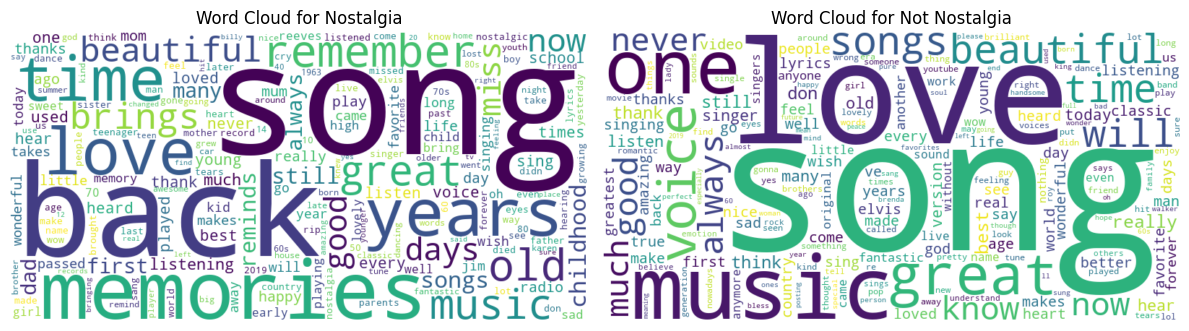

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

# Define your custom stopwords
custom_stopwords = set(STOPWORDS).union(set([
    'the', 'is', 'in', 'and', 'to', 'of', 'a', 'for', 'that', 'it', 
    'with', 'this', 'on', 'as', 'at', 'by', 'an', 'be', 'are', 'was', 
    'but', 'not', 'or', 'from', 'which', 'all', 'we', 'you', 'my', 
    'they', 'their', 'there', 'if', 'so', 'just', 'like', 'about', 
    'what', 'when', 'where', 'who', 'how', 'more', 'than', 'some', 
    'no', 'out', 'up', 'down', 'get', 'got', 'gotta', 'need', 'want'
]))

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Assuming you have a DataFrame `filt_term_document_dfs` with term frequencies for each sentiment
# Create a DataFrame for nostalgia
nostalgia_terms = filt_term_document_dfs['nostalgia'].sum(axis=0).sort_values(ascending=False)
nostalgia_df = pd.DataFrame(nostalgia_terms).reset_index()
nostalgia_df.columns = ['Term', 'Frequency']

# Create a DataFrame for not nostalgia
not_nostalgia_terms = filt_term_document_dfs['not nostalgia'].sum(axis=0).sort_values(ascending=False)
not_nostalgia_df = pd.DataFrame(not_nostalgia_terms).reset_index()
not_nostalgia_df.columns = ['Term', 'Frequency']

# Clean the terms
nostalgia_df['Term'] = nostalgia_df['Term'].apply(clean_text)
not_nostalgia_df['Term'] = not_nostalgia_df['Term'].apply(clean_text)

# Combine terms and frequencies into a dictionary for word cloud generation
nostalgia_freq_dict = dict(zip(nostalgia_df['Term'], nostalgia_df['Frequency']))
not_nostalgia_freq_dict = dict(zip(not_nostalgia_df['Term'], not_nostalgia_df['Frequency']))

# Remove stopwords from frequency dictionaries
nostalgia_freq_dict = {term: freq for term, freq in nostalgia_freq_dict.items() if term not in custom_stopwords}
not_nostalgia_freq_dict = {term: freq for term, freq in not_nostalgia_freq_dict.items() if term not in custom_stopwords}

# Generate word cloud for nostalgia without stopwords
nostalgia_wordcloud = WordCloud(width=800, height=400, 
                                background_color='white', 
                                stopwords=custom_stopwords).generate_from_frequencies(nostalgia_freq_dict)

# Generate word cloud for not nostalgia without stopwords
not_nostalgia_wordcloud = WordCloud(width=800, height=400, 
                                     background_color='white', 
                                     stopwords=custom_stopwords).generate_from_frequencies(not_nostalgia_freq_dict)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Nostalgia Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(nostalgia_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Nostalgia')

# Not Nostalgia Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(not_nostalgia_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Not Nostalgia')

plt.tight_layout()
plt.show()

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])  # Create TF-IDF document matrix

# Split the data into training and testing sets for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['sentiment_binary'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier using TF-IDF features
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions on the test set using TF-IDF features
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the classifier using TF-IDF features
print("TF-IDF Classifier Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nTF-IDF Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf))

# Generate word frequency features (if not already done)
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['comment'])  # Create word frequency document matrix

# Split the data into training and testing sets for word frequency features
X_train_counts, X_test_counts, y_train_counts, y_test_counts = train_test_split(X_counts, df['sentiment_binary'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier using word frequency features
nb_classifier_counts = MultinomialNB()
nb_classifier_counts.fit(X_train_counts, y_train_counts)

# Make predictions on the test set using word frequency features
y_pred_counts = nb_classifier_counts.predict(X_test_counts)

print("Word Frequency Classifier Accuracy:", accuracy_score(y_test_counts, y_pred_counts))
print("\nWord Frequency Classification Report:\n", classification_report(y_test_counts, y_pred_counts))

TF-IDF Classifier Accuracy: 0.8488888888888889

TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       225
           1       0.80      0.93      0.86       225

    accuracy                           0.85       450
   macro avg       0.86      0.85      0.85       450
weighted avg       0.86      0.85      0.85       450

Word Frequency Classifier Accuracy: 0.8422222222222222

Word Frequency Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       225
           1       0.79      0.93      0.85       225

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450



## 4.
#### Redundant Data Checks
- The notebook checks for missing values multiple times using different methods. This can be consolidated into a single function that checks for missing values and returns a summary.
- Improvement: Create a function to check for missing values and call it once.
```python
   def check_missing_values(df):
       return df.isnull().sum()
```
#### Handling Duplicates
- The code checks for duplicates and drops them in multiple steps. This can be streamlined.
- Improvement: Combine duplicate checks and drops into a single step.
```python
   df.drop_duplicates(inplace=True)
```
#### DataFrame Concatentation
- The notebook concatenates DataFrames multiple times (e.g., adding dummy records). This can be done in a single operation.
- Improvement: Create a list of DataFrames to concatenate at once.
```python
   df = pd.concat([df] + [dummy_df1, dummy_df2], ignore_index=True)
```
#### Tokenization and Feature Extraction
- The tokenization and feature extraction processes are repeated for different analyses. This can be modularized.
- Improvement: Create functions for tokenization and feature extraction that can be reused.
```python
   def tokenize_and_vectorize(df, column):
       # Tokenization and vectorization logic
       return vectorized_data
```
#### Visualization Code
- The plotting code is repeated for different visualizations. This can be modularized into functions to avoid redundancy.
- Improvement: Create a function for plotting that takes parameters for the data and plot type.
```python
   def plot_sentiment_distribution(data, title):
       data.value_counts().plot(kind='bar', title=title)
```
#### Hardcoded Values
- There are hardcoded values (e.g., thresholds for filtering terms) that could be parameterized for flexibility.
- Improvement: Use variables or function parameters for thresholds.
```python
   def filter_terms_by_frequency(terms, threshold):
       return [term for term in terms if term.frequency > threshold]
```
### Inefficnet Looping
- The notebook uses loops to create term-document matrices and calculate frequencies, which can be slow for large
- Improvement: Use vectorized operations with Pandas or NumPy to speed up calculations.
```python
   term_frequencies = df_counts.sum(axis=0)
```